# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

### Submitted By:
- Arohan Sharma
- Emma Wang
- Brian Wickman
- Mooseok (Keving) Kang
- Gurjivan Kalkat

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

In [11]:
import pandas as pd

sheet_names = ['descriptions', 'hedge_fund_series', 'merrill_factors', 'other_data']
proshares_analysis_data = {}

for sheet in sheet_names:
    proshares_analysis_data[sheet] = pd.read_excel(
        r'/Users/arohansharma/Desktop/assignments/finm-portfolio-2024/data/proshares_analysis_data.xlsx', 
        header=0, index_col=0, sheet_name=sheet)

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [12]:
print('Mean (Annualised):')
mean_returns_hf_series = proshares_analysis_data['hedge_fund_series'].mean()
display(mean_returns_hf_series*12)
print('Volatility (Annualised):')
vol_returns_hf_series = proshares_analysis_data['hedge_fund_series'].std()
display(vol_returns_hf_series*(12**0.5))
print('Sharpe (Annualised):')
display((12**0.5)*mean_returns_hf_series/vol_returns_hf_series)

Mean (Annualised):


HFRIFWI Index     0.048295
MLEIFCTR Index    0.036286
MLEIFCTX Index    0.034605
HDG US Equity     0.024812
QAI US Equity     0.025653
dtype: float64

Volatility (Annualised):


HFRIFWI Index     0.059476
MLEIFCTR Index    0.056136
MLEIFCTX Index    0.055980
HDG US Equity     0.058408
QAI US Equity     0.050009
dtype: float64

Sharpe (Annualised):


HFRIFWI Index     0.812004
MLEIFCTR Index    0.646398
MLEIFCTX Index    0.618172
HDG US Equity     0.424805
QAI US Equity     0.512971
dtype: float64

## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [13]:
def cvar(series):
    s = series.loc[series <= series.quantile(0.05)]
    return s.mean()

def max_drawdown(series):
    
    cum_val = series.cumsum()
    high_val = cum_val.cummax()
    drawdown = cum_val - high_val
    md = drawdown.min()
    max_drawdown_idx = drawdown.idxmin()
    high_val_at_max_drawdown = high_val[drawdown.idxmin()]
    start_date = high_val[high_val == high_val_at_max_drawdown].index[0]
    end_date = high_val[high_val == high_val_at_max_drawdown].index[-1]
    recovery = end_date - start_date
    return pd.Series(data=[md, start_date, max_drawdown_idx.date(), end_date, recovery.days], 
                     index=['Max Drawdown', 'Start Date', 'Low Date', 'Recovery Date', 'Recovery Period'])

print('Skewness')
hf_series_skewness = proshares_analysis_data['hedge_fund_series'].skew()
display(hf_series_skewness)
print('Kurtosis')
hf_series_kurtosis = proshares_analysis_data['hedge_fund_series'].kurtosis()
display(hf_series_kurtosis)
print('VaR(0.05)')
hf_series_var = proshares_analysis_data['hedge_fund_series'].quantile(0.05)
display(hf_series_var)
print('CVaR(0.05)')
hf_series_cvar = proshares_analysis_data['hedge_fund_series'].apply(cvar)
display(hf_series_cvar)
print('Max Drawdown')
proshares_analysis_data['hedge_fund_series'].apply(max_drawdown)

Skewness


HFRIFWI Index    -0.963318
MLEIFCTR Index   -0.265394
MLEIFCTX Index   -0.251279
HDG US Equity    -0.254201
QAI US Equity    -0.434775
dtype: float64

Kurtosis


HFRIFWI Index     5.763074
MLEIFCTR Index    1.631580
MLEIFCTX Index    1.595863
HDG US Equity     1.759250
QAI US Equity     1.605934
dtype: float64

VaR(0.05)


HFRIFWI Index    -0.024293
MLEIFCTR Index   -0.028189
MLEIFCTX Index   -0.028095
HDG US Equity    -0.030932
QAI US Equity    -0.017895
Name: 0.05, dtype: float64

CVaR(0.05)


HFRIFWI Index    -0.037478
MLEIFCTR Index   -0.035857
MLEIFCTX Index   -0.035816
HDG US Equity    -0.037575
QAI US Equity    -0.032695
dtype: float64

Max Drawdown


,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Max Drawdown,-0.11804,-0.129428,-0.129539,-0.148219,-0.14541
Start Date,2019-12-31 00:00:00,2021-06-30 00:00:00,2021-06-30 00:00:00,2021-06-30 00:00:00,2021-06-30 00:00:00
Low Date,2020-03-31,2022-09-30,2022-09-30,2022-09-30,2022-09-30
Recovery Date,2020-06-30 00:00:00,2023-11-30 00:00:00,2024-01-31 00:00:00,2024-06-30 00:00:00,2024-01-31 00:00:00
Recovery Period,182,883,945,1096,945


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [14]:
import statsmodels.api as sm
import numpy as np

def spy_regression(series):
    spy_returns = proshares_analysis_data['merrill_factors']['SPY US Equity']
    spy_returns = sm.add_constant(np.array(spy_returns))
    lin_regression = sm.OLS(np.array(series), spy_returns)
    results = lin_regression.fit()
    market_beta = results.params[-1]
    alpha  = results.params[0]
    treynor_ratio = series.mean()/market_beta
    information_ratio = alpha/(series - proshares_analysis_data['merrill_factors']['SPY US Equity']).std()
    return pd.Series(data = [market_beta, treynor_ratio, information_ratio], index=['Beta', 'Treynor Ratio', 'IR'])

proshares_analysis_data['hedge_fund_series'].apply(spy_regression)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Beta,0.346131,0.343383,0.342171,0.352053,0.298376
Treynor Ratio,0.011627,0.008806,0.008428,0.005873,0.007165
IR,-0.003305,-0.037344,-0.041684,-0.074946,-0.046755


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

#### 1. the differences between SPY and the hedge-fund series?
Information Ratio is negative for all hedgefunds meaning that they underperform the benchmark. 
#### 2. which performs better between HDG and QAI.
In terms of both treynor_ratio and information_ratio QAI performs better. QAI gives better expected return over same market exposure(treynor ratio) and less negative alpha for std of unit residuals. 
#### 3. whether HDG and the ML series capture the most notable properties of HFRI.
Most notable property of HRFI is that it has excess kurtosis over normal distribution but the other two exhibits negative excess kurtosis

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

Highest Correlation: HDG US Equity - MLEIFCTR Index/MLEIFCTX Index
Lowest Correlation: QAI US Equity-HFRIFWI Index


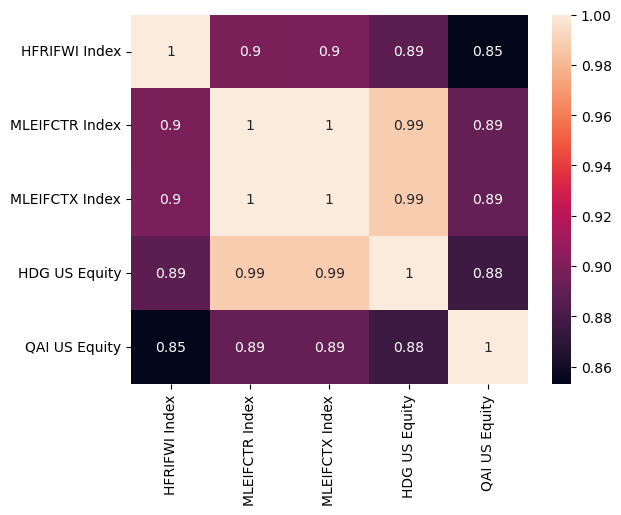

In [15]:
import seaborn as sns
%matplotlib inline

sns.heatmap(proshares_analysis_data['hedge_fund_series'].corr(), annot=True)

print('Highest Correlation: HDG US Equity - MLEIFCTR Index/MLEIFCTX Index')
print('Lowest Correlation: QAI US Equity-HFRIFWI Index')

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.
b. Are the betas realistic position sizes, or do they require huge long-short positions?
c. Report the R-squared.
d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [16]:
def merrill_lin_reg(y):
    X = np.array(proshares_analysis_data['merrill_factors'])
    X = sm.add_constant(np.array(X))
    reg = sm.OLS(np.array(y), X)
    reg = reg.fit()
    
    result_index = ['Intercept', 'SPY US Equity Beta', 'USGG3M Index Beta', 'EEM US Equity Beta', 'EFA US Equity Beta', 'EUO US Equity Beta', 'IWM US Equity Beta']
    
    r_sq = reg.rsquared
    r_sq_adj = reg.rsquared_adj
    tracking_error = (np.array(y) - reg.fittedvalues).std()
    
    result_index.append('R-Square')
    result_index.append('Adjusted R-Square')
    result_index.append('Tracking Error')
 
    result = list(reg.params)
    result.append(r_sq)
    result.append(r_sq_adj)
    result.append(tracking_error)
    
    return pd.Series(data=result, index=result_index, name='HFRIFWI Index')
    
merrill_lin_reg(proshares_analysis_data['hedge_fund_series']['HFRIFWI Index']).to_frame()

,HFRIFWI Index
Intercept,0.001235
SPY US Equity Beta,0.036483
USGG3M Index Beta,0.146336
EEM US Equity Beta,0.081611
EFA US Equity Beta,0.084638
EUO US Equity Beta,0.028806
IWM US Equity Beta,0.145111
R-Square,0.839676
Adjusted R-Square,0.833306
Tracking Error,0.006853


The betas are realistic position sizes and do not require huge long-short positions. All the funds are positively correlated with the underlying factors.

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [17]:
oos_returns = {}

hf = 'HFRIFWI Index'
    
oos_returns[hf] = []

for i in range(61, len(proshares_analysis_data['merrill_factors'])):

    y = np.array(proshares_analysis_data['hedge_fund_series'][hf].iloc[i-1-60:i-1])
    X = np.array(proshares_analysis_data['merrill_factors'].iloc[i-1-60:i-1])
    X = sm.add_constant(X)
    reg = sm.OLS(np.array(y), X)
    reg = reg.fit()
    intercept = reg.params[0]
    coeff = reg.params[1:]
    oos_returns[hf].append(np.array(proshares_analysis_data['merrill_factors'].iloc[i])@coeff.T + intercept)

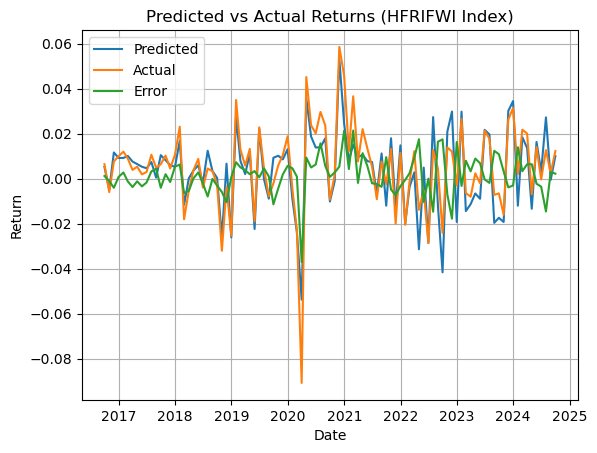

In [18]:
import matplotlib.pyplot as plt

oos_returns[hf] = pd.Series(oos_returns[hf], index = proshares_analysis_data['hedge_fund_series'][hf].iloc[61:].index)
plt.plot(oos_returns[hf], label='Predicted')
plt.plot(proshares_analysis_data['hedge_fund_series'][hf].iloc[61:], label='Actual')
error = proshares_analysis_data['hedge_fund_series'][hf].iloc[61:] - oos_returns[hf]
plt.plot(error, label='Error')
plt.grid()
plt.legend()
plt.title(f'Predicted vs Actual Returns ({hf})')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()
plt.close()

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [19]:
def merrill_lin_reg(y):
    X = np.array(proshares_analysis_data['merrill_factors'])
    reg = sm.OLS(np.array(y), X)
    reg = reg.fit()
    
    result_index = ['SPY US Equity Beta', 'USGG3M Index Beta', 'EEM US Equity Beta', 'EFA US Equity Beta', 'EUO US Equity Beta', 'IWM US Equity Beta']
    
    r_sq = reg.rsquared
    r_sq_adj = reg.rsquared_adj
    tracking_error = (np.array(y) - reg.fittedvalues).std()
    
    result_index.append('R-Square')
    result_index.append('Adjusted R-Square')
    result_index.append('Tracking Error')
 
    result = list(reg.params)
    result.append(r_sq)
    result.append(r_sq_adj)
    result.append(tracking_error)
    
    return pd.Series(data=result, index=result_index, name='HFRIFWI Index')
    
merrill_lin_reg(proshares_analysis_data['hedge_fund_series']['HFRIFWI Index']).to_frame()

,HFRIFWI Index
SPY US Equity Beta,0.050667
USGG3M Index Beta,0.499336
EEM US Equity Beta,0.080866
EFA US Equity Beta,0.079146
EUO US Equity Beta,0.031373
IWM US Equity Beta,0.142651
R-Square,0.845162
Adjusted R-Square,0.839050
Tracking Error,0.006880


The regression without the intercept gives a better R-Square and thus performs better. Since the assets defined in the Merrill-Factors sheet defines our investible universe, the returns of each fund should be completely attributable to the factors themselves and any alpha should be a result of errors in the model. Thus, it makes sense that the regression without the intercept produces better results and we should be using the regression without the intercept for replication.

***